# SAURABH GUPTA


# Summarizing Student Data Graphically

## Task 1

### Categorical variables

• Create a stacked bar graph and a side-by-side bar graph. Give relevant x and y labels, and a title for the plots.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/ST590/HW03"
student_data = pd.read_csv("/content/drive/My Drive/ST590/HW03/student-mat.csv", sep=";")
#student_data.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
BreastCancer.dat  StudentData.txt  student-mat.csv  student-merge.R  student-por.csv  student.txt


In [5]:
student_data.columns
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [21]:
#convert Mother's job variable
student_data["Mjob"] = student_data.Mjob.astype("category")
student_data.Mjob = student_data.Mjob.cat.rename_categories(["at_home", "health", "other", "services", "teacher"])
#convert Father's job variable
student_data["Fjob"] = student_data.Fjob.astype("category")
student_data.Fjob = student_data.Fjob.cat.rename_categories(["at_home", "health", "other", "services", "teacher"])
#convert higehr eduction variable
student_data["higher"] = student_data.higher.astype("category")
student_data.higher = student_data.higher.cat.rename_categories(["NoCollege", "HigherEducation"])

### Plotting matplotlib

In [22]:
pd.crosstab(
  student_data.Mjob, #index variable
  student_data.Fjob, #column variable
  margins = True,
  rownames = ["Mother's Job"],
  colnames = ["Father's Job"])


Father's Job,at_home,health,other,services,teacher,All
Mother's Job,,,,,,
at_home,7,2,33,15,2,59
health,0,6,17,10,1,34
other,5,2,104,24,6,141
services,6,4,42,43,8,103
teacher,2,4,21,19,12,58
All,20,18,217,111,29,395


In [23]:
stack_table = pd.crosstab(student_data.Mjob, student_data.higher)
stack_table

higher,NoCollege,HigherEducation
Mjob,,
at_home,7,52
health,0,34
other,7,134
services,5,98
teacher,1,57


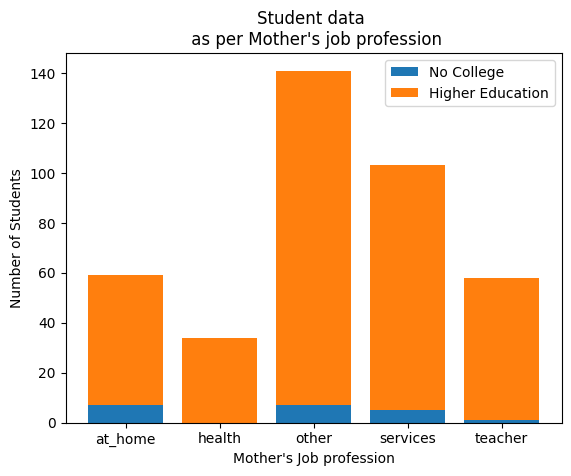

In [27]:
plt.bar(
  x = student_data.Mjob.cat.categories,
  height = stack_table.loc[:, "NoCollege"],
  label = "No College")
plt.bar(
  x = student_data.Mjob.cat.categories,
  height = stack_table.loc[:, "HigherEducation"],
  bottom = stack_table.loc[:, "NoCollege"],
  label = "Higher Education"
)
plt.xlabel("Mother's Job profession")
plt.ylabel("Number of Students")
plt.title("Student data \n as per Mother's job profession")
plt.legend(loc = 0)

<BarContainer object of 5 artists>

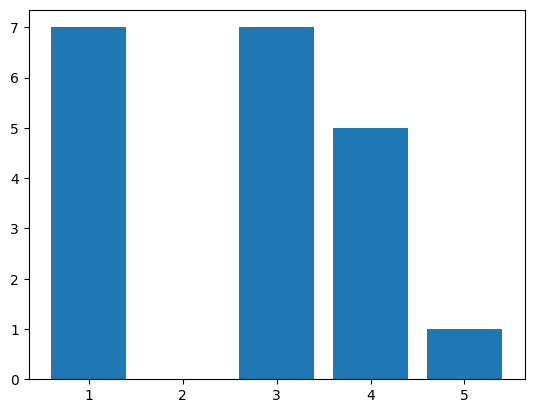

In [34]:
plt.bar(
  x = [1, 2, 3,4,5],
  height = stack_table.loc[:, "NoCollege"],
  label = "Died")

Text(0.5, 1.0, "Student data \n as per Mother's job profession")

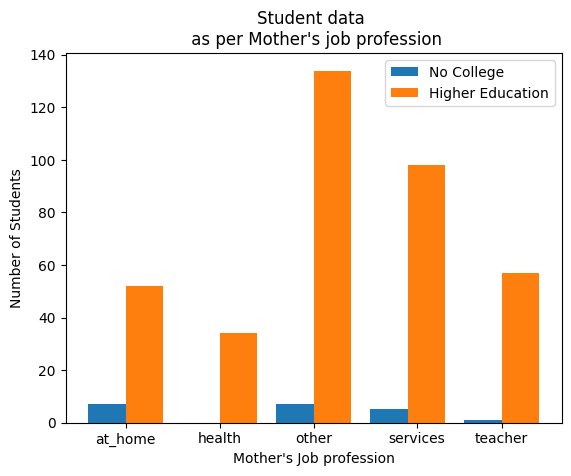

In [38]:
plt.bar(
  x = [1, 2, 3, 4, 5],
  height = stack_table.loc[:, "NoCollege"],
  width = 0.4,
  label = "No College")
plt.bar(
  x = [1.4, 2.4, 3.4,4.4,5.4],
  height = stack_table.loc[:, "HigherEducation"],
  width = 0.4,
  label = "Higher Education")
plt.xticks([1.2, 2.2, 3.2,4.3,5.2], student_data.Mjob.cat.categories)
plt.xlabel("Mother's Job profession")
plt.ylabel("Number of Students")
plt.legend(loc = 0)
plt.title("Student data \n as per Mother's job profession")

### plotting pandas


In [15]:
student_data["dummy"] = 0
#temp_df = pd.crosstab(index = student_data.Mjob, columns = student_data.dummy, margins = True)
table = pd.crosstab(student_data["Mjob"], student_data["higher"])
table

higher,No College,Higher Education
Mjob,,
at_home,7,52
health,0,34
other,7,134
services,5,98
teacher,1,57


<Axes: xlabel='Mjob'>

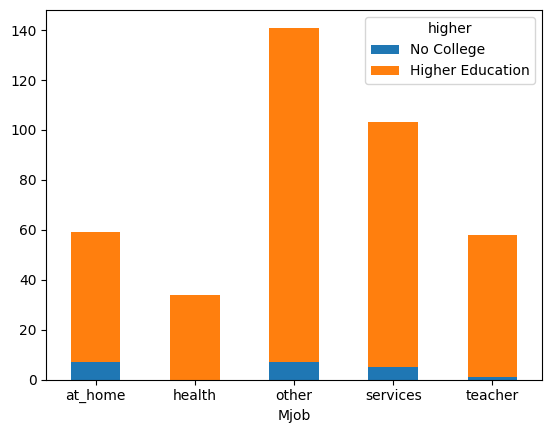

In [16]:
table.plot.bar(stacked = True, rot = 0)
# side by side bar plot. remove stacked
# table.plot.bar( rot = 0)

## Task 2 Numeric variables (and across groups)


### Create a histogram, kernel density plot, and boxplot

Create a histogram, kernel density plot, and boxplot for two of the numeric variables across one of the categorical variables (that is, create graphs that can compare the distributions across the groups). For at least one of the kernel density plots across groups, make sure that the graphs are overlayed on the same plot. Add appropriate labels and titles.

In [41]:
selected_columns = ['age', 'absences', 'G1', 'G2','G3']
my_sub_data = student_data[selected_columns]
my_sub_data

,age,absences,G1,G2,G3
0,18,6,5,6,6
1,17,4,5,5,6
2,15,10,7,8,10
3,15,2,15,14,15
4,16,4,6,10,10
...,...,...,...,...,...
390,20,11,9,9,9
391,17,3,14,16,16
392,21,3,10,8,7
393,18,0,11,12,10


(29, 2)


<Axes: ylabel='Frequency'>

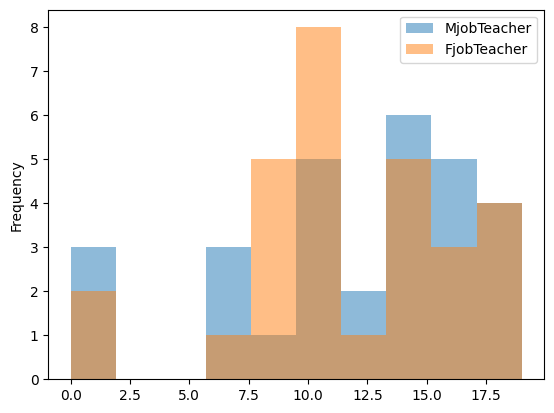

In [55]:
List = ['teacher', 'other', 'at_home', 'services', 'health']
#student_data[student_data['age']]['final_grade'].plot(kind='hist', bins=10, alpha=0.7, ax=axes[1], label='Category A')
#student_data[student_data['abscence']]['final_grade'].plot(kind='hist', bins=10, alpha=0.7, ax=axes[1], label='Category B')
Fjob_final_grade = student_data.loc[ student_data.Fjob == "teacher", "G3"]
Mjob_final_grade = student_data.loc[ student_data.Mjob == "teacher", "G3"]

temp = pd.DataFrame(zip(Fjob_final_grade, Mjob_final_grade), columns = ["MjobTeacher", "FjobTeacher"])
print(temp.shape)
#only has 500 rows instead of 809!
temp.plot.hist(alpha = 0.5)


Mjob
at_home     [[Axes(0.125,0.11;0.775x0.77)]]
health      [[Axes(0.125,0.11;0.775x0.77)]]
other       [[Axes(0.125,0.11;0.775x0.77)]]
services    [[Axes(0.125,0.11;0.775x0.77)]]
teacher     [[Axes(0.125,0.11;0.775x0.77)]]
dtype: object

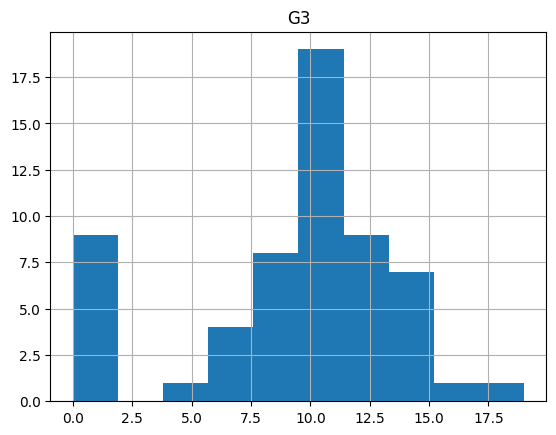

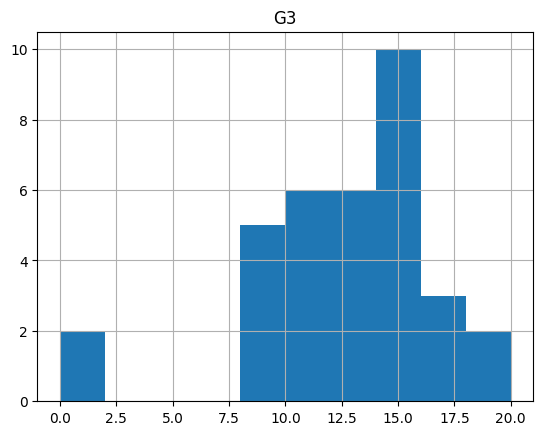

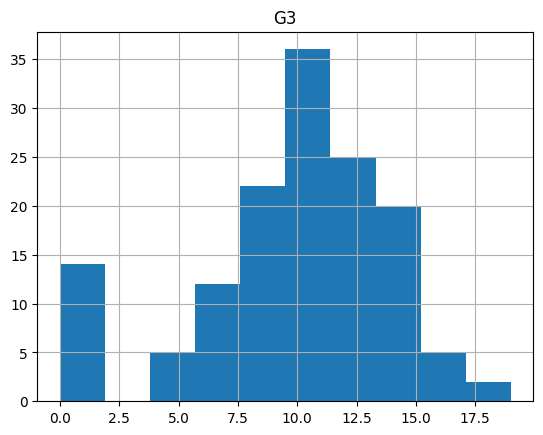

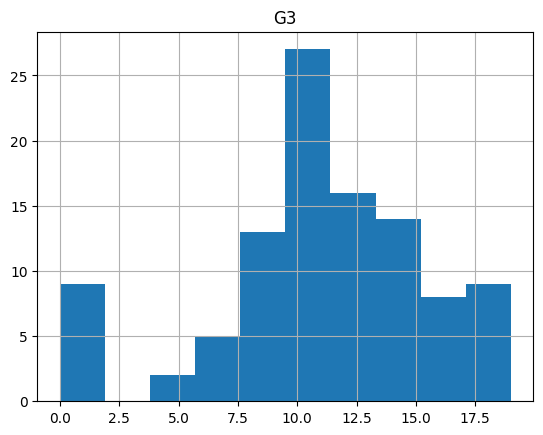

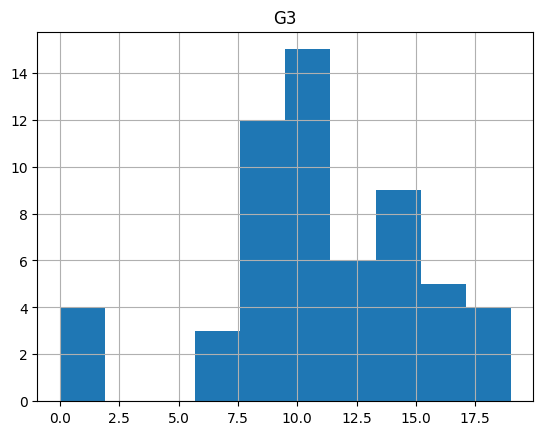

In [57]:
student_data[["G3", "Mjob"]].groupby("Mjob").hist()

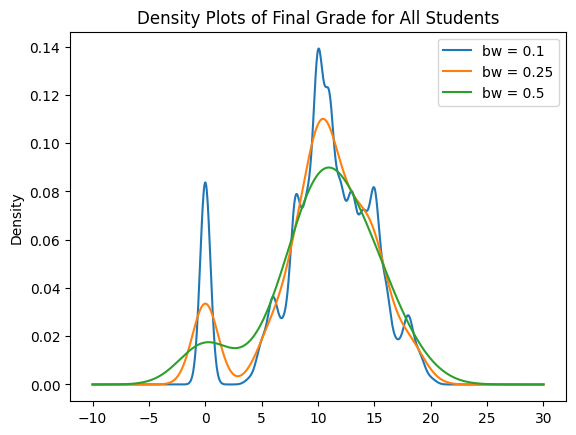

In [60]:
student_data.G3.plot.density(bw_method = 0.1, label = "bw = 0.1",
                                  title = "Density Plots of Final Grade for All Students")
student_data.G3.plot.density(bw_method = 0.25, label = "bw = 0.25")
student_data.G3.plot.density(bw_method = 0.5, label = "bw = 0.5")
plt.legend()

Text(0.5, 1.0, 'Boxplot of Final Score by Absences')

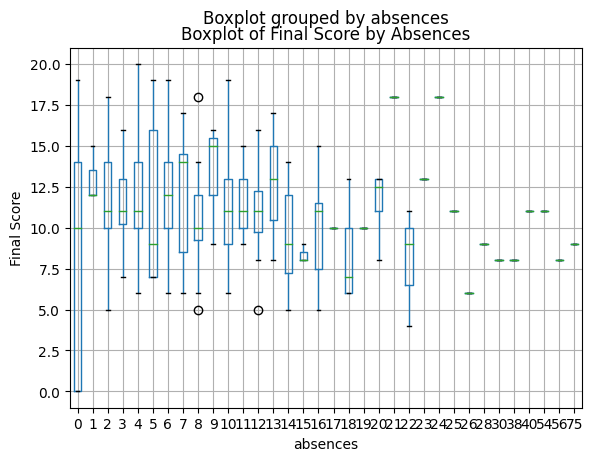

In [68]:
student_data.boxplot(column = ["G3"], by = "absences")
# Set plot labels
plt.xlabel('absences')
plt.ylabel('Final Score')
plt.title('Boxplot of Final Score by Absences')

Text(0.5, 1.0, 'Scatter Plot of Total Score vs. Absences')

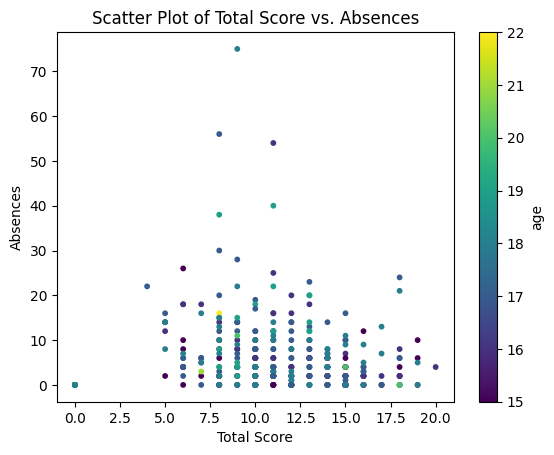

In [67]:
student_data.plot.scatter(x = "G3", y = "absences", c = "age", cmap = "viridis", s = 10)
# Set plot labels
plt.xlabel('Total Score')
plt.ylabel('Absences')
plt.title('Scatter Plot of Total Score vs. Absences')

# Plotting the NFL Data

## Task 1: Read the data

In [69]:
import pandas as pd


from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ST590/HW04/scoresFull.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
nfl_full_score_data = pd.read_csv(file_path, delimiter=',')
nfl_sub_score_data = nfl_full_score_data.head(3)

# Set the option to display all columns
pd.set_option('display.max_columns', None)


In [71]:
nfl_full_score_data.head(3)

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,AOT2,AFinal,homeTeam,HQ1,HQ2,HQ3,HQ4,HOT,HOT2,HFinal,stadium,startTime,toss,roof,surface,duration,attendance,weather,vegasLine,OU,AfirstDowns,AnetPassYds,AtotalYds,Aturnovers,AtotalPlays,HfirstDowns,HnetPassYds,HtotalYds,Hturnovers,HtotalPlays,OUvalue,OUresult,awayRushAtt,awayRushYds,awayRushTD,awayPassComp,awayPassAtt,awayPassYds,awayPassTD,awayPassInt,awayTimesSacked,awaySackYdsLost,awayFum,awayFumLost,awayNumPen,awayPenYds,away3rdConv,away3rdAtt,away4thConv,away4thAtt,awayTOP,homeRushAtt,homeRushYds,homeRushTD,homePassComp,homePassAtt,homePassYds,homePassTD,homePassInt,homeTimesSacked,homeSackYdsLost,homeFum,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,-1,16,New York Giants,3,3,0,7,-1,-1,13,Giants Stadium,8:38pm,Giants,outdoors,grass,170,"78,748","73 degrees relative humidity 49%, wind 7 mph",San Francisco 49ers -4.0,39.0 (under),13,166,279,1,51,21,318,361,3,70,39.0,(under),25,113,0,16,26,166,1,1,0,0,0,0,5,29,2,6,0,0,27.53,22,43,1,28,45,342,0,3,3,24,0,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,-1,23,Chicago Bears,7,3,3,14,-1,-1,27,Memorial Stadium (Champaign),1:04pm,Vikings,outdoors,astroplay,201,"63,226","85 degrees relative humidity 0%, wind 3 mph",Chicago Bears -4.5,41.0 (over),19,228,368,3,62,20,288,368,2,60,41.0,(over),33,140,1,16,28,234,1,2,1,6,2,1,8,52,3,8,0,0,31.52,26,80,1,20,33,297,2,1,1,9,1,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,-1,26,Tampa Bay Buccaneers,0,3,7,10,0,-1,20,Raymond James Stadium,4:15pm,Buccaneers,outdoors,grass,221,"65,554","90 degrees relative humidity 57%, wind 6 mph",Tampa Bay Buccaneers -6.0,37.5 (over),21,250,368,1,78,19,261,333,1,77,37.5,(over),34,118,0,24,42,260,2,1,2,10,0,0,5,45,6,11,0,0,40.68,21,72,0,28,53,278,2,1,3,17,1,0,8,85,1,6,0,1,31.48,-6,6.0


In [72]:
# Get unique values of a specific column, for example, 'Name'
unique_names = nfl_full_score_data['week'].unique()

# Print the unique values
print("Unique Names:", unique_names)

Unique Names: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' 'WildCard' 'Division' 'ConfChamp' 'SuperBowl']


In [73]:
category_list = ['homeTeam','awayTeam','day','stadium','startTime','toss','roof','surface']
nfl_full_score_data[category_list] = nfl_full_score_data[category_list].astype("category")
# This doesnt convert list of columns all together so doing it another way

In [74]:
nfl_full_score_data["homeTeam"] = nfl_full_score_data.homeTeam.astype("category")
nfl_full_score_data["awayTeam"] = nfl_full_score_data.awayTeam.astype("category")
nfl_full_score_data["day"] = nfl_full_score_data.day.astype("category")
nfl_full_score_data["stadium"] = nfl_full_score_data.stadium.astype("category")
nfl_full_score_data["startTime"] = nfl_full_score_data.startTime.astype("category")
nfl_full_score_data["toss"] = nfl_full_score_data.toss.astype("category")
nfl_full_score_data["roof"] = nfl_full_score_data.roof.astype("category")
nfl_full_score_data["surface"] = nfl_full_score_data.surface.astype("category")



In [ ]:
nfl_full_score_data.info()

## Task 2 : Summarize Data

 I want you to look at some trends during the regular season. This means you should remove any data where the week is not 1 through 17.

In [76]:
nfl_full_score_data.size

284622

In [77]:
#nfl_full_score_data['week'] = nfl_full_score_data['week'].astype(int)
# This gives errors as week column also has non numeric values.

# Replace non-numeric values with NaN
# Convert 'ObjectColumn' to integers
# Display the DataFrame with the updated column type

#nfl_full_score_data['week'] = pd.to_numeric(nfl_full_score_data['week'], errors='coerce')
#nfl_full_score_data['week'] = nfl_full_score_data['week'].astype('Int64')
#print(nfl_full_score_data['week'].info)
#print(nfl_full_score_data['week'].unique())

# Now all my other non numeric week values converted into NA and I lost that information.
# Not sure if this is good idea so taking another way of doing


In [78]:
temp_df = nfl_full_score_data["week"].isin(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
 '17'])
nfl_sub_score_data = nfl_full_score_data[temp_df]

print(nfl_full_score_data["week"].info)



<bound method Series.info of 0               1
1               1
2               1
3               1
4               1
          ...    
3466     Division
3467     Division
3468    ConfChamp
3469    ConfChamp
3470    SuperBowl
Name: week, Length: 3471, dtype: object>


In [79]:
print(nfl_sub_score_data["week"].info)
nfl_sub_score_data.isnull().sum()

<bound method Series.info of 0        1
1        1
2        1
3        1
4        1
        ..
3455    17
3456    17
3457    17
3458    17
3459    17
Name: week, Length: 3328, dtype: object>


week            0
date            0
day             0
season          0
awayTeam        0
               ..
home4thConv     0
home4thAtt      0
homeTOP         0
HminusAScore    0
homeSpread      0
Length: 82, dtype: int64

You should summarize some of the variables grouped by season and week, season alone, and week alone (three different scenarios).

In [80]:
# Get unique values of a specific column, for example, 'Name'
unique_names = nfl_full_score_data['homeTeam'].unique()

# Print the unique values
print("Unique Names:", unique_names)

Unique Names: ['New York Giants', 'Chicago Bears', 'Tampa Bay Buccaneers', 'Buffalo Bills', 'Washington Redskins', ..., 'Pittsburgh Steelers', 'Kansas City Chiefs', 'Detroit Lions', 'Arizona Cardinals', 'Philadelphia Eagles']
Length: 32
Categories (32, object): ['Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens', 'Buffalo Bills', ...,
                          'St. Louis Rams', 'Tampa Bay Buccaneers', 'Tennessee Titans',
                          'Washington Redskins']


In [81]:
# Group by home team and calculate the mean total yards
grouped_by_home_team = nfl_sub_score_data.groupby('homeTeam')['AtotalYds'].mean()

# Group by away team and calculate the mean total yards
grouped_by_away_team = nfl_sub_score_data.groupby('awayTeam')['HtotalYds'].mean()

# Combine the results into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'MeanTotalYards_HomeTeam': grouped_by_home_team,
    'MeanTotalYards_AwayTeam': grouped_by_away_team
})

# Display the comparison DataFrame
print("\nComparison of Mean Total Yards:")
print(comparison_df)


Comparison of Mean Total Yards:
                      MeanTotalYards_HomeTeam  MeanTotalYards_AwayTeam
Arizona Cardinals                  332.490385               351.634615
Atlanta Falcons                    344.519231               357.000000
Baltimore Ravens                   292.278846               315.211538
Buffalo Bills                      316.230769               345.605769
Carolina Panthers                  311.067308               328.961538
Chicago Bears                      331.067308               338.394231
Cincinnati Bengals                 330.865385               333.403846
Cleveland Browns                   336.932692               352.567308
Dallas Cowboys                     327.596154               330.134615
Denver Broncos                     325.942308               323.692308
Detroit Lions                      343.307692               363.855769
Green Bay Packers                  326.653846               334.692308
Houston Texans                     341.22115

In [82]:
#['homeTeam','awayTeam','day','stadium','startTime','toss','roof','surface']
temp_df1 = nfl_sub_score_data.groupby("season").agg({'AFinal':'sum','HFinal':'sum'})

grouped_by_away_team = nfl_sub_score_data.groupby(['awayTeam', 'season']).agg({'HQ1':'sum','HQ2':'sum','HQ3':'sum','HQ4':'sum'})
grouped_by_home_team = nfl_sub_score_data.groupby(['homeTeam', 'season']).agg({'AQ1':'sum','AQ2':'sum','AQ3':'sum','AQ4':'sum'})

# Display the comparison DataFrames
print("\nQuarterly Score Averages Grouped by Home Team and Season:")
print(grouped_by_home_team)

print("\nQuarterly Score Averages Grouped by Away Team and Season:")
print(grouped_by_away_team)




Quarterly Score Averages Grouped by Home Team and Season:
                            AQ1  AQ2  AQ3  AQ4
homeTeam            season                    
Arizona Cardinals   2002     59   54   33   22
                    2003     44   50   31   43
                    2004     21   44   41   13
                    2005     44   37   38   41
                    2006     27   53   44   61
...                         ...  ...  ...  ...
Washington Redskins 2010     52   47   64   21
                    2011     52   52   40   55
                    2012     40   58    9   70
                    2013     60   90   28   67
                    2014     51   67   32   68

[416 rows x 4 columns]

Quarterly Score Averages Grouped by Away Team and Season:
                            HQ1  HQ2  HQ3  HQ4
awayTeam            season                    
Arizona Cardinals   2002     50  104   37   58
                    2003     73   67   68   73
                    2004     43   56   22   76
            

In [85]:
# Group by home team and calculate the mean total yards
temo_df1 = nfl_sub_score_data.groupby(["week"]).agg({'AFinal':'sum', 'HFinal' : 'sum'})
print(temo_df1)

grouped_by_home_team = nfl_sub_score_data.groupby([  'week'])['AFinal'].sum()

# Group by away team and calculate the mean total yards
grouped_by_away_team = nfl_sub_score_data.groupby([  'week'])['HFinal'].sum()

# Combine the results into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'MeanTotalYards_HomeTeam': grouped_by_home_team,
    'MeanTotalYards_AwayTeam': grouped_by_away_team
})

# Display the comparison DataFrame
print("\nComparison of Mean Total Yards:")
print(comparison_df)

      AFinal  HFinal
week                
1       4101    4605
10      4007    4275
11      3938    4539
12      4409    4690
13      4251    4826
14      4034    5118
15      4356    4689
16      4327    4611
17      4001    4952
2       4046    4728
3       4112    4484
4       3861    4433
5       3736    4427
6       3743    4161
7       3800    4201
8       3587    4158
9       3942    3962

Comparison of Mean Total Yards:
      MeanTotalYards_HomeTeam  MeanTotalYards_AwayTeam
week                                                  
1                        4101                     4605
10                       4007                     4275
11                       3938                     4539
12                       4409                     4690
13                       4251                     4826
14                       4034                     5118
15                       4356                     4689
16                       4327                     4611
17                

In [86]:
# Group by home team and calculate the mean total yards
grouped_by_home_team = nfl_sub_score_data.groupby([ 'season', 'week'])['AtotalYds'].sum()

# Group by away team and calculate the mean total yards
grouped_by_away_team = nfl_sub_score_data.groupby([ 'season', 'week'])['HtotalYds'].sum()

# Combine the results into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'MeanTotalYards_HomeTeam': grouped_by_home_team,
    'MeanTotalYards_AwayTeam': grouped_by_away_team
})

# Display the comparison DataFrame
print("\nComparison of Mean Total Yards:")
print(comparison_df)


Comparison of Mean Total Yards:
             MeanTotalYards_HomeTeam  MeanTotalYards_AwayTeam
season week                                                  
2002   1                        4960                     5578
       10                       4940                     5248
       11                       4786                     5509
       12                       5724                     5270
       13                       5025                     5428
...                              ...                      ...
2014   5                        4969                     5812
       6                        5874                     4931
       7                        4970                     5107
       8                        5478                     5649
       9                        4482                     4453

[221 rows x 2 columns]


In [87]:
import matplotlib.pyplot as plt

In [ ]:
def plot_numeric_variable_over_time(student_data, x_column, y_column, hue_column=None, plot_type='bar'):
    plt.figure(figsize=(10, 6))

    if plot_type == 'bar':
        plt.bar(
            x = student_data.x_column.cat.categories,
            height = stack_table.loc[:, "NoCollege"],
            label = "No College")
          plt.bar(
            x = student_data.x_column.cat.categories,
            height = stack_table.loc[:, "HigherEducation"],
            bottom = stack_table.loc[:, "NoCollege"],
            label = "Higher Education"
          )
          plt.xlabel(x_column)
          plt.ylabel(y_column)
          plt.title("Student data ")
          plt.legend(loc = 0)
    else:
        # Handle other plot types if needed
        pass

    plt.show()

#####################################################
###### Saurabh Ran out of time to complete this #####
#####################################################

In [ ]:
plot_numeric_variable_over_time(comparison_df, 'week', 'MeanTotalYards_HomeTeam', 'MeanTotalYards_AwayTeam')